In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns


C:\Users\sudesh yadav\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [56]:
## loading the dataset 
df = pd.read_csv("Bird Strikes data.xlsx - Bird Strikes.csv")


In [4]:
## checking the head of the dataset 
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


# Data visualisation 


In [6]:
## various attributes in the dataset 
attributes=(list(df))
attributes

['Record ID',
 'Aircraft: Type',
 'Airport: Name',
 'Altitude bin',
 'Aircraft: Make/Model',
 'Wildlife: Number struck',
 'Wildlife: Number Struck Actual',
 'Effect: Impact to flight',
 'FlightDate',
 'Effect: Indicated Damage',
 'Aircraft: Number of engines?',
 'Aircraft: Airline/Operator',
 'Origin State',
 'When: Phase of flight',
 'Conditions: Precipitation',
 'Remains of wildlife collected?',
 'Remains of wildlife sent to Smithsonian',
 'Remarks',
 'Wildlife: Size',
 'Conditions: Sky',
 'Wildlife: Species',
 'Pilot warned of birds or wildlife?',
 'Cost: Total $',
 'Feet above ground',
 'Number of people injured',
 'Is Aircraft Large?']

# Visuals Depicting the Number of Bird Strikes

In [90]:
bird_number = df['Wildlife: Number struck']
bird_number 

0        Over 100
1        Over 100
2        Over 100
3        Over 100
4        Over 100
           ...   
25553           1
25554           1
25555         NaN
25556           1
25557           1
Name: Wildlife: Number struck, Length: 25558, dtype: object

In [92]:
bird_number = df["Wildlife: Species"]
bird_counts=species.value_counts()
print(bird_counts)

Unknown bird - small     10505
Unknown bird - medium     4318
Mourning dove              898
European starling          885
Unknown bird - large       797
                         ...  
Cape May warbler             1
Western bluebird             1
Common ground-dove           1
Yellow-billed magpie         1
Pine grosbeak                1
Name: Wildlife: Species, Length: 348, dtype: int64


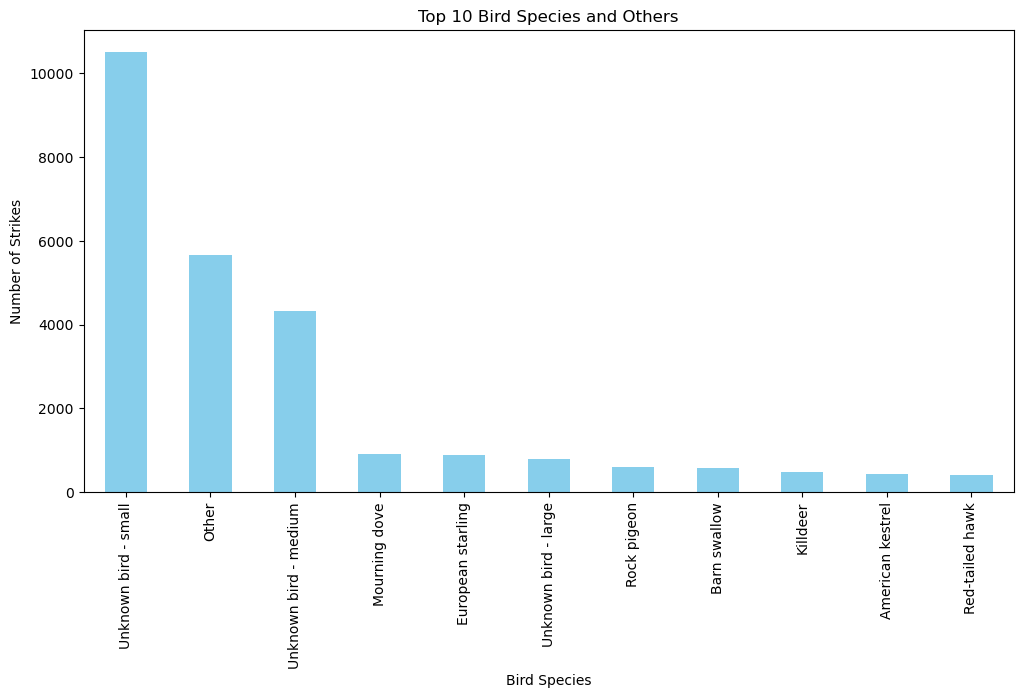

In [96]:
## the plot for the top ten species of the birds 

# Get the top N most frequent species
top_n = 10
top_species = df['Wildlife: Species'].value_counts().nlargest(top_n).index

# Create a new column 'TopSpecies' where non-top species are labeled as 'Other'
df['TopSpecies'] = df['Wildlife: Species'].where(df['Wildlife: Species'].isin(top_species), 'Other')

# Plot bar plot
plt.figure(figsize=(12, 6))
df['TopSpecies'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Bird Species')
plt.ylabel('Number of Strikes')
plt.title(f'Top {top_n} Bird Species and Others')
plt.show()


# Yearly Analysis & Bird Strikes in the US

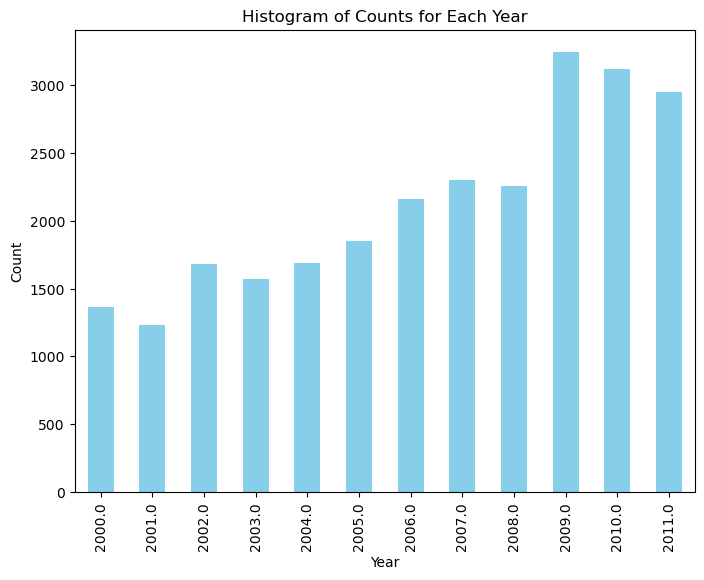

In [61]:
# Convert 'FlightDate' column to datetime format
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%m/%d/%y %H:%M')
df['year'] = df['FlightDate'].dt.year

# Plot histogram
plt.figure(figsize=(8, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Counts for Each Year')
plt.show()

# Airports with most incidents of bird strikes – Top 50

In [64]:
Airport = df["Airport: Name"]
Airport_count= Airport.value_counts()
print(Airport_count)

DALLAS/FORT WORTH INTL ARPT    803
SACRAMENTO INTL                676
SALT LAKE CITY INTL            479
DENVER INTL AIRPORT            476
KANSAS CITY INTL               452
                              ... 
ORCAS ISLAND ARPT                1
T B LETTSOME INTL                1
DYERSBURG REGIONAL ARPT          1
MCCORD FIELD ARPT                1
PRINCESS JULIANA                 1
Name: Airport: Name, Length: 1109, dtype: int64


In [66]:
Airport_count.head(50)  ## top 10 Us airport having the most wildlife strike cases

DALLAS/FORT WORTH INTL ARPT               803
SACRAMENTO INTL                           676
SALT LAKE CITY INTL                       479
DENVER INTL AIRPORT                       476
KANSAS CITY INTL                          452
PHILADELPHIA INTL                         442
ORLANDO INTL                              408
BALTIMORE WASH INTL                       401
LOUISVILLE INTL ARPT                      395
JOHN F KENNEDY INTL                       390
CHARLOTTE/DOUGLAS INTL ARPT               367
NASHVILLE INTL                            364
LAMBERT-ST LOUIS INTL                     363
CHICAGO O'HARE INTL ARPT                  332
DETROIT METRO WAYNE COUNTY ARPT           321
PORTLAND INTL (OR)                        313
NEWARK LIBERTY INTL ARPT                  305
CINCINNATI/NORTHERN KENTUCKY INTL ARPT    302
ATLANTA INTL                              296
CHICAGO MIDWAY INTL ARPT                  296
HOUSTON-HOBBY                             294
FORT LAUDERDALE/HOLLYWOOD INTL    

## Yearly Cost Incurred due to Bird Strike

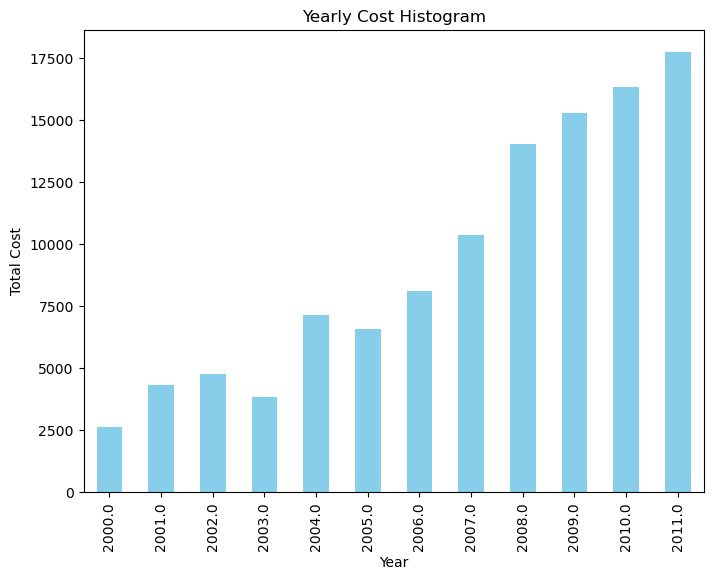

In [74]:
# Convert 'FlightDate' column to datetime format
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%m/%d/%y %H:%M')

# Extract the year from the datetime column
df['year'] = df['FlightDate'].dt.year

# Convert 'Cost: Total $' column to numeric
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Calculate yearly cost
yearly_cost = df.groupby('year')['Cost: Total $'].sum()

# Plot histogram
plt.figure(figsize=(8, 6))
yearly_cost.plot(kind='bar', color='skyblue') 
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.title('Yearly Cost Histogram')
plt.show()

## Altitude of aeroplanes at the time of strike

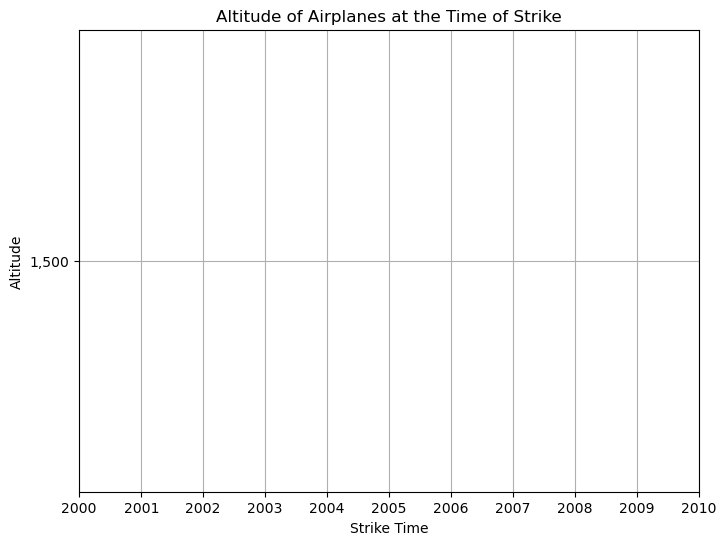

In [80]:
# Convert 'StrikeTime' column to datetime format with handling errors
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%m/%d/%y %H:%M', errors='coerce')

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['FlightDate'], df['Feet above ground'].astype(str), color='red', marker='o')
plt.xlabel('Strike Time')
plt.ylabel('Altitude')
plt.title('Altitude of Airplanes at the Time of Strike')
plt.grid(True)
plt.show()

## Effect of Strike at Different Altitude

In [81]:
df['Altitude bin']

0        > 1000 ft
1        < 1000 ft
2        < 1000 ft
3        < 1000 ft
4        < 1000 ft
           ...    
25553    > 1000 ft
25554    < 1000 ft
25555          NaN
25556    < 1000 ft
25557    < 1000 ft
Name: Altitude bin, Length: 25558, dtype: object

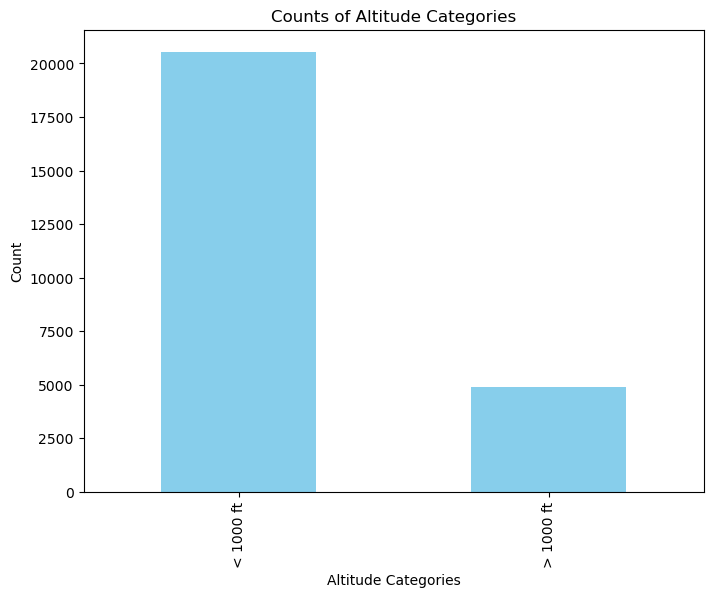

In [82]:
# Count the occurrences of each category in the 'Altitude bin' column
altitude_counts = df['Altitude bin'].value_counts()

# Plot bar plot
plt.figure(figsize=(8, 6))
altitude_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Altitude Categories')
plt.ylabel('Count')
plt.title('Counts of Altitude Categories')
plt.show()

# Which bird species has caused the most damage to airplanes?

In [18]:
species = df["Wildlife: Species"]
species_count=species.value_counts()
print(species_count)

Unknown bird - small     10505
Unknown bird - medium     4318
Mourning dove              898
European starling          885
Unknown bird - large       797
                         ...  
Cape May warbler             1
Western bluebird             1
Common ground-dove           1
Yellow-billed magpie         1
Pine grosbeak                1
Name: Wildlife: Species, Length: 348, dtype: int64


In [22]:
species_count=species_count[species_count>200] ## spices which are have more than 200 cases
print(species_count)

Unknown bird - small     10505
Unknown bird - medium     4318
Mourning dove              898
European starling          885
Unknown bird - large       797
Rock pigeon                596
Barn swallow               579
Killdeer                   470
American kestrel           444
Red-tailed hawk            412
Canada goose               371
Horned lark                339
Ring-billed gull           241
Name: Wildlife: Species, dtype: int64


### Top species

In [23]:
top_species = ["Unknown bird - small",
"Unknown bird - medium",     
"Mourning dove",             
"European starling",          
"Unknown bird - large",       
"Rock pigeon",                
"Barn swallow",               
"Killdeer",                  
"American kestrel",          
"Red-tailed hawk",            
"Canada goose",               
"Horned lark",                
"Ring-billed gull" ]
top_species = species[species.isin(top_species)]
print(top_species.value_counts())

Unknown bird - small     10505
Unknown bird - medium     4318
Mourning dove              898
European starling          885
Unknown bird - large       797
Rock pigeon                596
Barn swallow               579
Killdeer                   470
American kestrel           444
Red-tailed hawk            412
Canada goose               371
Horned lark                339
Ring-billed gull           241
Name: Wildlife: Species, dtype: int64


C:\Users\sudesh yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Unknown bird - medium'),
  Text(1, 0, 'Rock pigeon'),
  Text(2, 0, 'European starling'),
  Text(3, 0, 'Unknown bird - small'),
  Text(4, 0, 'Canada goose'),
  Text(5, 0, 'Ring-billed gull'),
  Text(6, 0, 'Killdeer'),
  Text(7, 0, 'Unknown bird - large'),
  Text(8, 0, 'American kestrel'),
  Text(9, 0, 'Mourning dove'),
  Text(10, 0, 'Horned lark'),
  Text(11, 0, 'Barn swallow'),
  Text(12, 0, 'Red-tailed hawk')])

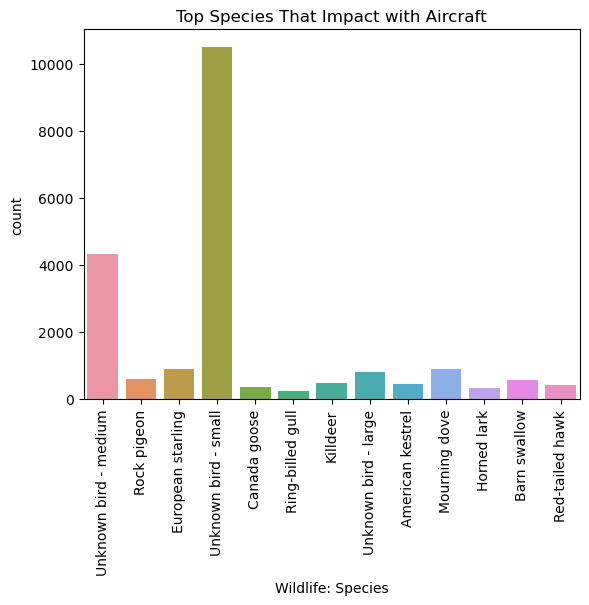

In [24]:
sns.countplot(top_species)
plt.title("Top Species That Impact with Aircraft")
plt.xticks(rotation='vertical')

### Top known species

In [25]:
top_known_species = ["Rock pigeon", "European starling", "Canada goose", "Ring-billed gull", "Killdeer", "American kestrel","Mourning dove", "Horned lark", "Barn swallow", "Red-tailed hawk" ]
top_known_species = species[species.isin(top_known_species)]
print(top_known_species.value_counts())

Mourning dove        898
European starling    885
Rock pigeon          596
Barn swallow         579
Killdeer             470
American kestrel     444
Red-tailed hawk      412
Canada goose         371
Horned lark          339
Ring-billed gull     241
Name: Wildlife: Species, dtype: int64


C:\Users\sudesh yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rock pigeon'),
  Text(1, 0, 'European starling'),
  Text(2, 0, 'Canada goose'),
  Text(3, 0, 'Ring-billed gull'),
  Text(4, 0, 'Killdeer'),
  Text(5, 0, 'American kestrel'),
  Text(6, 0, 'Mourning dove'),
  Text(7, 0, 'Horned lark'),
  Text(8, 0, 'Barn swallow'),
  Text(9, 0, 'Red-tailed hawk')])

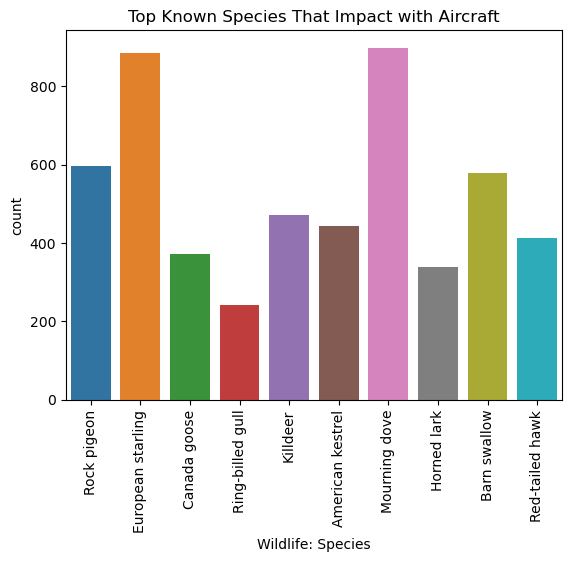

In [26]:
sns.countplot(top_known_species)
plt.title("Top Known Species That Impact with Aircraft")
plt.xticks(rotation='vertical')

#  what was the wildlife srtrike impact to the aircraft?

In [39]:
effect = df["Effect: Impact to flight"]

In [40]:
effect_count = df["Effect: Impact to flight"].value_counts()

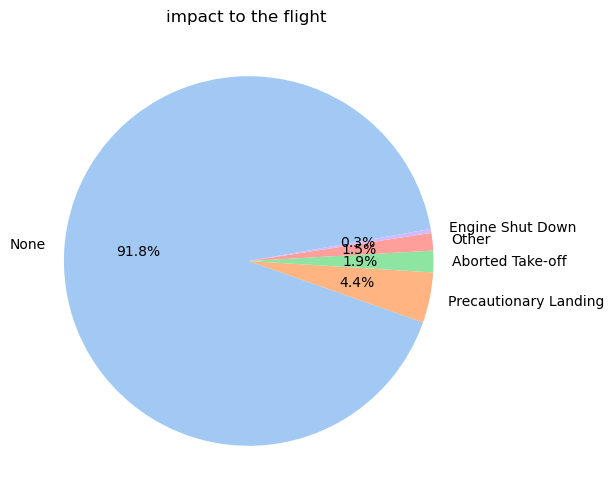

In [97]:
# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(effect_count, labels=effect_count.index, autopct='%1.1f%%', startangle=10, colors=sns.color_palette('pastel'))
plt.title('impact to the flight ')
plt.show()

# Does there was a damge after the strike of the bird ?


In [43]:
damage = df["Effect: Indicated Damage"]

In [46]:
# Count the occurrences of each category
damage_counts = df['Effect: Indicated Damage'].value_counts()



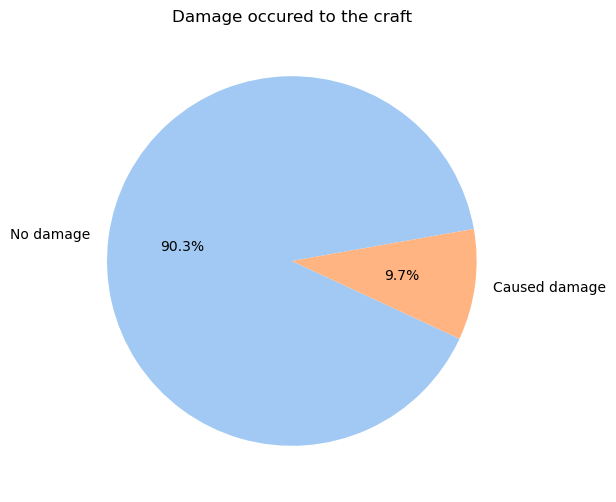

In [98]:
# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', startangle=10, colors=sns.color_palette('pastel'))
plt.title('Damage occured to the craft')
plt.show()

# what was thesize of the wildlife that strike to the aircraft ?


In [28]:
## the various sizes that are given in the dataset ?
df["Wildlife: Size"]

0        Medium
1         Small
2         Small
3         Small
4         Small
          ...  
25553     Large
25554     Small
25555       NaN
25556    Medium
25557    Medium
Name: Wildlife: Size, Length: 25558, dtype: object

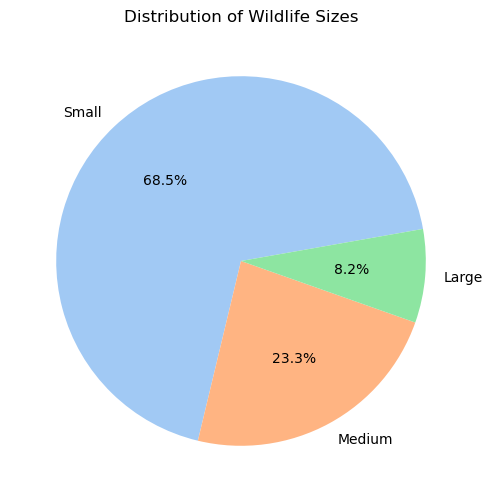

In [38]:
# Count the occurrences of each category
size_counts = df['Wildlife: Size'].value_counts()

# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=10, colors=sns.color_palette('pastel'))
plt.title('Distribution of Wildlife Sizes')
plt.show()

conclusion : From the above plot we conclude that the maximum number of wildlife 
             that are striking to the aircraft are of small size. 

## How many times the pilot warned about the wildlife ?


In [52]:
warns = df["Pilot warned of birds or wildlife?"]
warns

0          N
1          Y
2          N
3          Y
4          N
        ... 
25553      N
25554      Y
25555    NaN
25556      Y
25557      N
Name: Pilot warned of birds or wildlife?, Length: 25558, dtype: object

C:\Users\sudesh yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of the times the pilot warns')

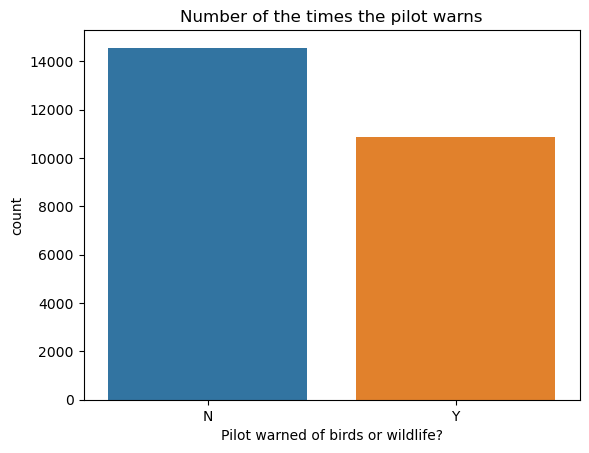

In [51]:
sns.countplot(warns)
plt.title("Number of the times the pilot warns")


# Prior Warning and Effect of Strike Relation

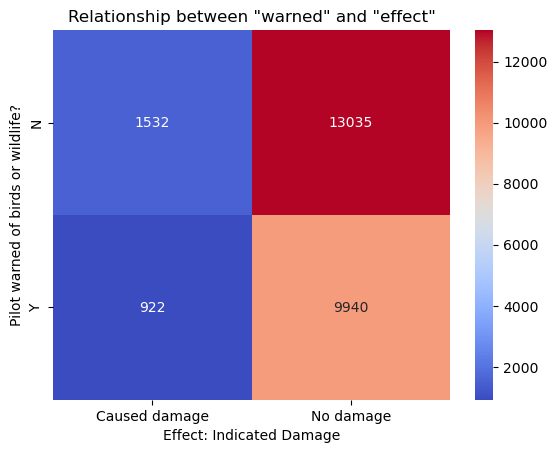

In [54]:
# Heatmap
heatmap_data = pd.crosstab(df["Pilot warned of birds or wildlife?"], df["Effect: Indicated Damage"])
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship between "warned" and "effect"')
plt.show()